In [57]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as md
import datetime as dt
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
import ggplot2

ModuleNotFoundError: No module named 'ggplot2'

In [68]:
dt

<module 'datetime' from '/home/peter/.pyenv/versions/3.10.6/lib/python3.10/datetime.py'>

In [2]:
#adding moving average, price and volume

In [65]:
data = pd.read_csv('cleaned_tweets_without_dupes_120323.csv', lineterminator='\n', index_col=0)

In [66]:
data.head()

,datetime,username,text,date,negative_bert,neutral_bert,positive_bert
0,2021-01-01 22:09:59+00:00,sivilianlife,What's the chances @Grayscale is hedging short...,2021-01-01,0.002040,0.951312,0.046648
1,2021-01-01 22:09:39+00:00,LudicrousSpeed9,@CNBC Buy #Bitcoin to hedge against the result...,2021-01-01,0.004157,0.400750,0.595093
2,2021-01-01 22:09:35+00:00,SergioBowers1,@APompliano @pepsi @MonsterEnergy $DEO $KO e...,2021-01-01,0.000248,0.582107,0.417644
3,2021-01-01 22:09:21+00:00,bitvestor,Closed another chunk of this long now. Remaind...,2021-01-01,0.000974,0.807066,0.191960
4,2021-01-01 22:09:18+00:00,FROMKAIWITHLOVE,When you dig deeper into #kardiachain company ...,2021-01-01,0.000056,0.223449,0.776495


In [5]:
data2 = data[['date','MA7_Sentiment','BTC_price']]

In [11]:
data['date'] = pd.to_datetime(data['date'])

In [7]:
elon_add_BTC = data['date'][26]
elon_add_BTC_anno = data['date'][31]
elon_add_BTC_text = '''Elon Musk adds #bitcoin 
to his twitter profile amind 
rumours of Tesla accepting 
Bitcoin payments'''
elon_lose_BTC = data['date'][131]
elon_lose_BTC_anno = data['date'][136]
elon_lose_BTC_text = '''Tesla stops accepting Bitcoin 
as payment for its cars due to 
concerns about its carbon emissions'''

In [8]:
elon_add_BTC_text

'Elon Musk adds #bitcoin \nto his twitter profile amind \nrumours of Tesla accepting \nBitcoin payments'

In [9]:
data['date'][146]

Timestamp('2021-05-27 00:00:00')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      798 non-null    int64         
 1   date            798 non-null    datetime64[ns]
 2   negative_bert   798 non-null    float64       
 3   neutral_bert    798 non-null    float64       
 4   positive_bert   798 non-null    float64       
 5   daily_tweets    798 non-null    float64       
 6   MA7_Sentiment   791 non-null    float64       
 7   MA20_Sentiment  778 non-null    float64       
 8   MA50_Sentiment  748 non-null    float64       
 9   BTC_price       798 non-null    float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 62.5 KB


In [17]:
vol_data = data

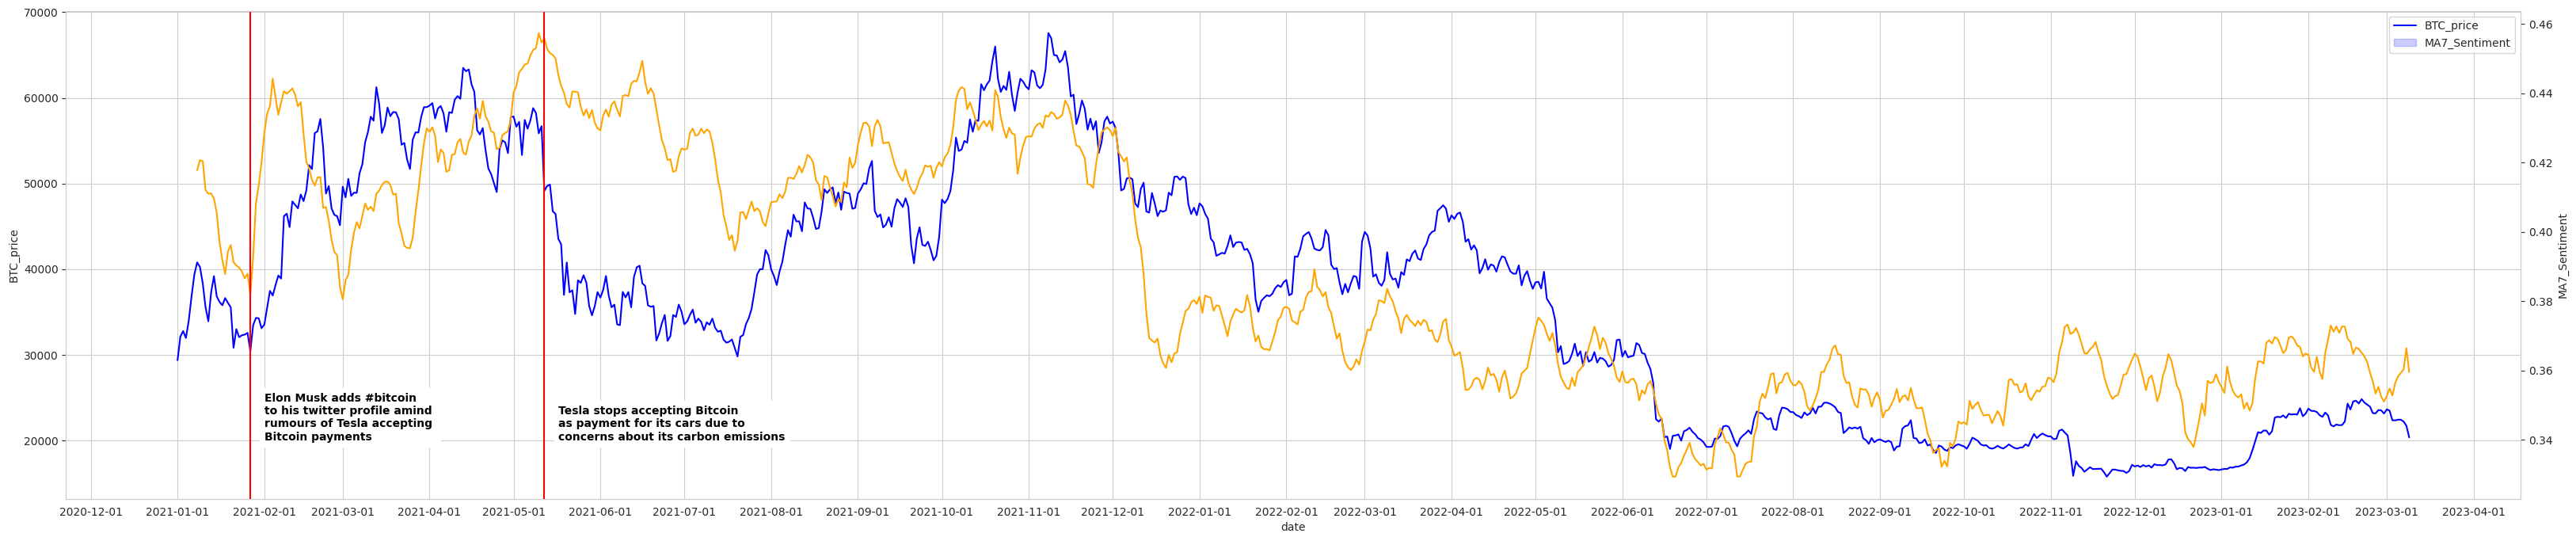

In [18]:
matplotlib.rc_file_defaults()

elon_add_BTC = vol_data['date'][26]
elon_add_BTC_anno = vol_data['date'][31]
elon_add_BTC_text = '''Elon Musk adds #bitcoin 
to his twitter profile amind 
rumours of Tesla accepting 
Bitcoin payments'''
elon_lose_BTC = vol_data['date'][131]
elon_lose_BTC_anno = vol_data['date'][136]
elon_lose_BTC_text = '''Tesla stops accepting Bitcoin 
as payment for its cars due to 
concerns about its carbon emissions'''

ax1 = sns.set_style("whitegrid")

fig, ax1 = plt.subplots(figsize=(40,8))

sns.lineplot(x = vol_data['date'], y=vol_data['BTC_price'], sort = False, color='blue',legend='brief')

ax2 = ax1.twinx()
sns.lineplot(x = vol_data['date'], y=vol_data['MA7_Sentiment'], sort = False, ax=ax2, color='orange',legend='brief').set_xticklabels
ax2.xaxis.set_major_locator(md.MonthLocator())
ax2.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
ax2.axvline(elon_add_BTC, color = 'red')
ax2.axvline(elon_lose_BTC, color = 'red')

ax1.legend(vol_data[['BTC_price','MA7_Sentiment']], loc='upper right')

plt.text(x=elon_add_BTC_anno, y=0.34,s=elon_add_BTC_text, horizontalalignment='left', size='medium', color='black', weight='semibold', backgroundcolor = 'white')
plt.text(x=elon_lose_BTC_anno, y=0.34,s=elon_lose_BTC_text, horizontalalignment='left', size='medium', color='black', weight='semibold', backgroundcolor = 'white')

plt.grid()

ConversionError: Failed to convert value(s) to axis units: Timestamp('2021-01-27 00:00:00')

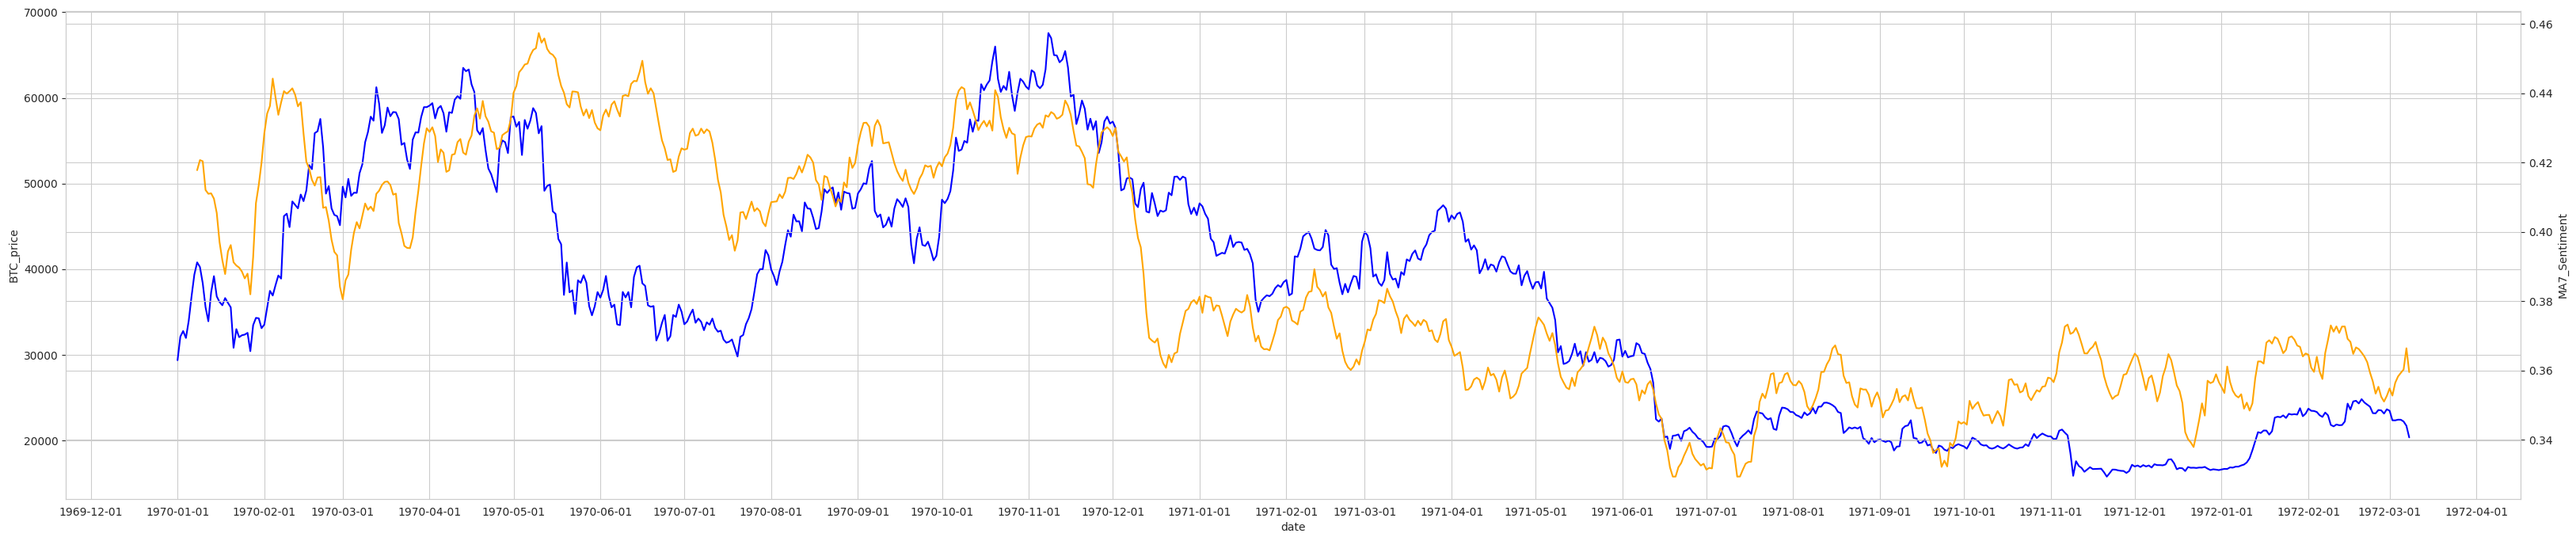

In [12]:
matplotlib.rc_file_defaults()

elon_add_BTC = data['date'][26]
elon_add_BTC_anno = data['date'][31]
elon_add_BTC_text = '''Elon Musk adds #bitcoin 
to his twitter profile amind 
rumours of Tesla accepting 
Bitcoin payments'''
elon_lose_BTC = data['date'][131]
elon_lose_BTC_anno = data['date'][136]
elon_lose_BTC_text = '''Tesla stops accepting Bitcoin 
as payment for its cars due to 
concerns about its carbon emissions'''

ax1 = sns.set_style("whitegrid")

fig, ax1 = plt.subplots(figsize=(40,8))

sns.lineplot(x = data2['date'], y=data2['BTC_price'], sort = False, color='blue',legend='brief')

ax2 = ax1.twinx()
sns.lineplot(x = data2['date'], y=data2['MA7_Sentiment'], sort = False, ax=ax2, color='orange',legend='brief').set_xticklabels
ax2.xaxis.set_major_locator(md.MonthLocator())
ax2.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
ax2.axvline(elon_add_BTC, color = 'red')
ax2.axvline(elon_lose_BTC, color = 'red')

ax1.legend(data2[['BTC_price','MA7_Sentiment']], loc='upper right')

plt.text(x=elon_add_BTC_anno, y=0.34,s=elon_add_BTC_text, horizontalalignment='left', size='medium', color='black', weight='semibold', backgroundcolor = 'white')
plt.text(x=elon_lose_BTC_anno, y=0.34,s=elon_lose_BTC_text, horizontalalignment='left', size='medium', color='black', weight='semibold', backgroundcolor = 'white')

plt.grid()


In [19]:
np.random.randn(20, 3)

array([[ 1.26192271,  0.60139209, -0.91053515],
       [ 1.25835019, -0.47908807,  0.38893918],
       [-1.85550834,  2.04722631, -0.58808052],
       [-0.18642277,  1.57443553, -0.31637298],
       [ 1.18444447,  0.91652833, -0.18938   ],
       [ 0.19441283, -1.09699388, -1.96390908],
       [-0.41310294,  0.59560266, -0.20595205],
       [ 1.18170005,  0.48491189, -0.75776836],
       [-0.62195577, -1.42422773,  1.08453279],
       [ 0.60767972,  1.58628449, -0.85838365],
       [-0.15020524, -1.20057397, -0.61786889],
       [ 0.73646733, -0.42256255, -1.26874458],
       [ 0.73459661, -0.82739407,  2.28872308],
       [-1.65372028, -0.36856121,  0.33306209],
       [-0.01062083,  1.07443869,  1.03272759],
       [-0.56615779, -2.32055407, -0.2813642 ],
       [-0.17400904,  0.14136001,  0.95455386],
       [ 0.27654709, -1.12255937,  0.40575193],
       [-1.46637705, -0.68824463, -1.27497665],
       [ 0.94300272,  1.37135277, -0.88430728]])

In [ ]:
#make graph for positive:neutral:negative sentiment over the last 50 days 

In [ ]:
data2.head()

In [20]:
data2['daily_tweets'] = data3.reset_index()['daily_tweets']
data2['BTC_price']=BTC_price.reset_index()['Adj Close']

NameError: name 'data3' is not defined

In [27]:
data2 = data.iloc[-50:]
data['pos_neg_ratio'] = data['positive_bert']/data['negative_bert']
data['pos_neg_ratio'] = data['positive_bert']/data['negative_bert']
max_ = data['positive_bert'].max()
min_ = data['positive_bert'].min()
data['pos_adj'] = ((data['positive_bert'])/(data['positive_bert'] + data['negative_bert']))
data['neg_adj'] = ((data['negative_bert'])/(data['positive_bert'] + data['negative_bert']))



/tmp/ipykernel_6409/4232155371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pos_neg_ratio'] = data['positive_bert']/data['negative_bert']
/tmp/ipykernel_6409/4232155371.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pos_neg_ratio'] = data['positive_bert']/data['negative_bert']
/tmp/ipykernel_6409/4232155371.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [50]:

data.head()

,Unnamed: 0,date,negative_bert,neutral_bert,positive_bert,daily_tweets,MA7_Sentiment,MA20_Sentiment,MA50_Sentiment,BTC_price,pos_neg_ratio,pos_adj,neg_adj
748,748,2023-01-19,0.112547,0.532842,0.354611,18453.067298,0.367810,0.358020,0.355650,21086.792969,3.150781,0.759082,0.240918
749,749,2023-01-20,0.091489,0.521419,0.387091,20340.646896,0.369688,0.359257,0.355781,22676.552734,4.231000,0.808832,0.191168
750,750,2023-01-21,0.113458,0.510576,0.375965,18281.472639,0.369155,0.360437,0.355857,22777.625000,3.313685,0.768180,0.231820
751,751,2023-01-22,0.102223,0.517583,0.380194,17071.681657,0.367219,0.362081,0.356340,22720.416016,3.719257,0.788102,0.211898
752,752,2023-01-23,0.073466,0.587847,0.338687,18960.758766,0.365026,0.361558,0.356330,22934.431641,4.610098,0.821750,0.178250


In [55]:
data2 = data.iloc[-30:]
# fig, ax = plt.subplots()
ax = plt.figure(figsize=(10,2))
data2['neg_adj']=data2['negative_bert']/ (data2['negative_bert'] + data2['positive_bert'])
data2['pos_adj']=data2['positive_bert']/ (data2['negative_bert'] + data2['positive_bert'])
# fig.xaxis.set_major_locator(md.DayLocator())
plt.stackplot(data2.date, data2.neg_adj, data2.pos_adj)
scale_y_continuous(labels = function(x) paste0(x*100, "%"))


SyntaxError: invalid syntax. Perhaps you forgot a comma? (1236326492.py, line 8)

In [ ]:
data2.tail()

In [ ]:
# sns.lineplot(data = data2['BTC_price_adjclose'], marker='o', sort = False)
# sns.lineplot(data = data2['MA7_Sentiment'], marker='o', sort = False)

sns.lineplot(data=data3)

In [ ]:
data2['bitcoin_volume'] = BTC_price['Volume']

In [ ]:
data2.tail()

In [ ]:
data2 = data2[['date','negative_bert', 'neutral_bert', 'positive_bert',
       'daily_tweets', 'MA7_Sentiment', 'MA20_Sentiment',
       'MA50_Sentiment', 'BTC_price']]

In [ ]:
# data2 = data2.rename(columns={"negative_bert": "average_neg", "neutral_bert": "average_neu", "positive_bert": "average_pos", 'BTC_new':'BTC_price'}),

In [ ]:
data2.to_csv('all_columns_daily_090323.csv')